In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv('Iris.csv')

In [58]:
data = data.drop(columns=['Id'])

In [59]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='Species', ylabel='count'>

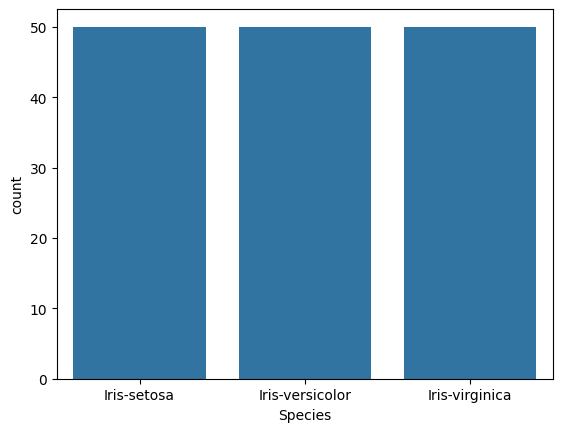

In [60]:
sns.barplot(data['Species'].value_counts())

In [61]:
df = data[data['Species'] != 'Iris-virginica']

In [62]:
X = df.drop(columns=['Species'])
y = df['Species']

In [63]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into training (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [64]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape,X_test.shape,y_test.shape)

(60, 4) (20, 4) (60,) (20,) (20, 4) (20,)


In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

In [66]:

# Create a random forest classifier
model = SVC()

# Define the range of parameters you want to tune
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

# Create a k-fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [68]:
svc = SVC(C=0.1,gamma=1,kernel='rbf')

In [69]:
svc.fit(X_train,y_train)

SVC(C=0.1, gamma=1)

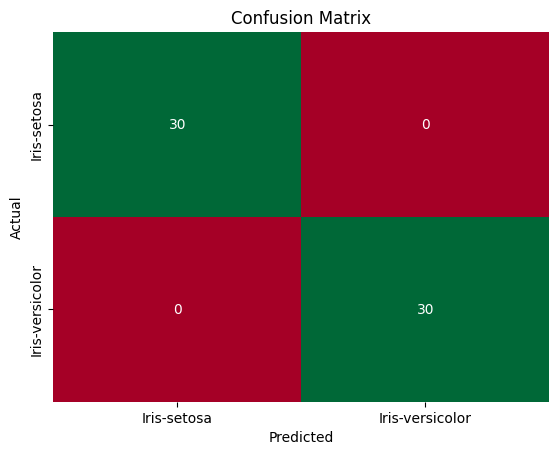

In [76]:
from sklearn.metrics import confusion_matrix

prediction = svc.predict(X_train)
cm = confusion_matrix(y_train, prediction)

labels = np.unique(y_train)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [77]:
TN, FP, FN, TP = cm.ravel()
accuracy = (TN + TP) / (TN + FP + FN + TP)
print("Accuracy Score =", format(accuracy))

Accuracy Score = 1.0


## K - Fold working

In [78]:
from sklearn.model_selection import KFold
fold=KFold(n_splits=4)
fold
for train_index,test_index in fold.split([1,2,3,4,5,6,7,8,9,10,11,12]):
    print(train_index,test_index)

[ 3  4  5  6  7  8  9 10 11] [0 1 2]
[ 0  1  2  6  7  8  9 10 11] [3 4 5]
[ 0  1  2  3  4  5  9 10 11] [6 7 8]
[0 1 2 3 4 5 6 7 8] [ 9 10 11]
